<a href="https://colab.research.google.com/github/debobratopaul/CAPSTONE_PROJECT_ML_Regression_Bike_Sharing_Demand_Prediction/blob/main/Capstone_Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Bike Sharing Demand Prediction**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
**Name-DEBOBRATO PAUL**


In [1]:
from IPython.display import Image
Image( url='https://i.ytimg.com/vi/5xVQD-gcj0U/maxresdefault.jpg',width=950)

# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different** model architectures and hyperparameter **settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of** ablation studies** to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

My goal is to develop a model that is highly accurate, with a low mean absolute error and a high R-squared value. The model should also be able to provide insights into the factors that most impact bike demand, helping the bike sharing company to make data-driven decisions about how to optimize their operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [6]:
# Dataset First Look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

In [8]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [9]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
bike_df.duplicated().value_counts()

False    8760
Name: count, dtype: int64

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

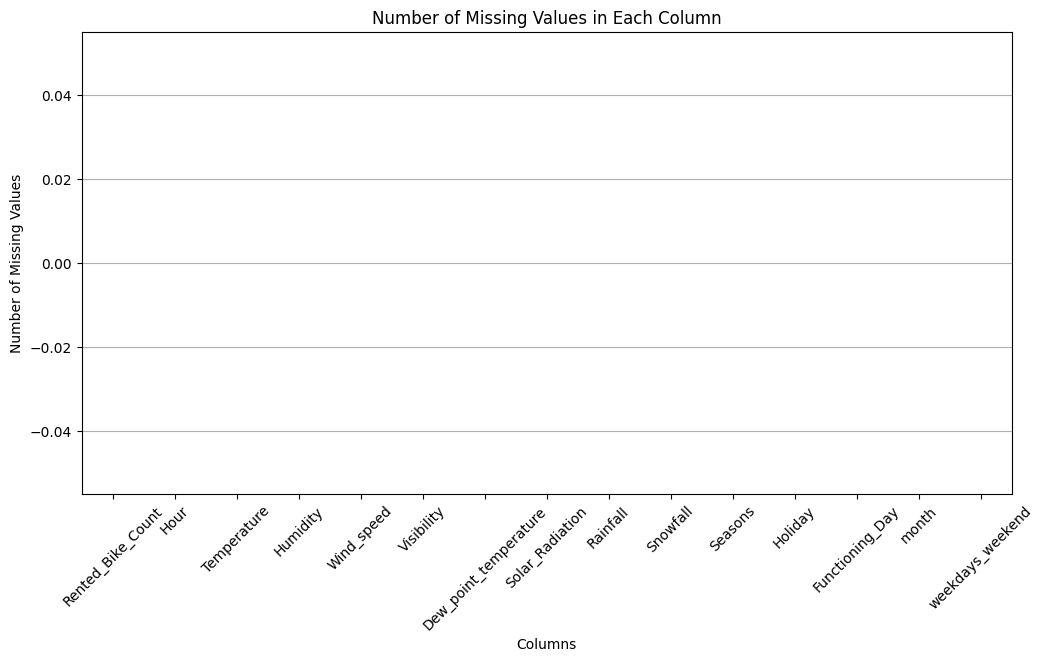

In [25]:
# Visualizing the missing values
missing_values = bike_df.isnull().sum()

# Step 2: Plot the bar chart
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')

# Customize the plot
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

### What did you know about your dataset?

There are 8760 observation and 14 features.





In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

There are no null values.

Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.

Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [14]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [17]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [18]:
bike_df['day'] = bike_df['Date'].dt.day_name()
bike_df['month'] = bike_df['Date'].dt.month

In [19]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day',],axis=1)

In [20]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [21]:
bike_df['weekdays_weekend'].value_counts()

weekdays_weekend
0    6264
1    2496
Name: count, dtype: int64

In [73]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [74]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

**Manipulations and insights**

In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

Some of the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.

Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.


 Column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data type if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

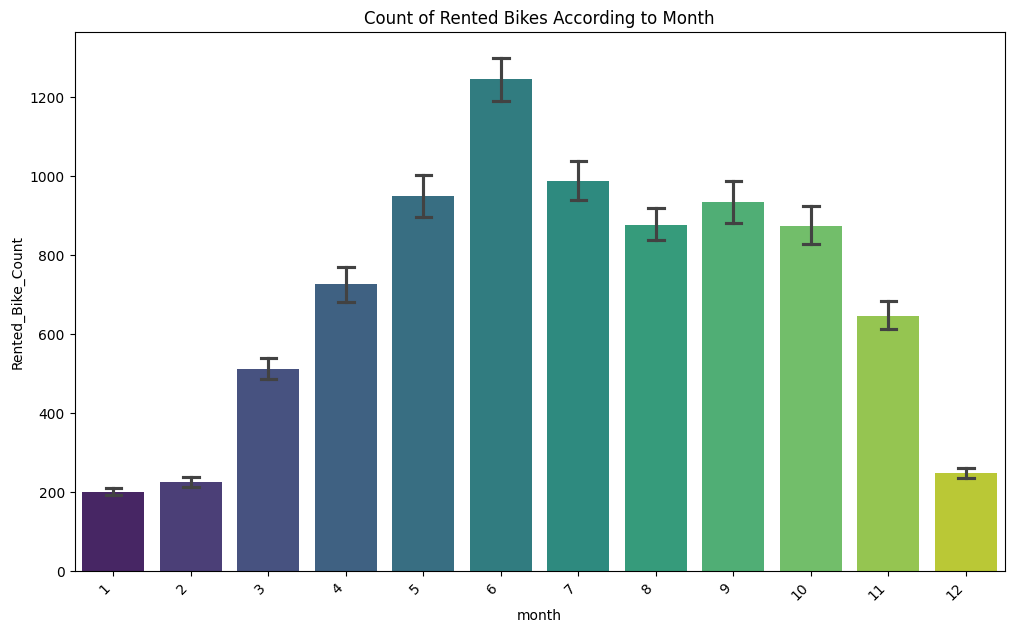

In [29]:
# Chart - 1 visualization code
palette = sns.color_palette("viridis", len(bike_df['month'].unique()))
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike_df, x='month', y='Rented_Bike_Count', ax=ax, palette=palette, capsize=.2)
ax.set(title='Count of Rented Bikes According to Month')

# Rotate x-tick labels for better readability if needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

##### 1. Why did you pick the specific chart?

 It effectively displays categorical data, allowing easy comparison of bike rental counts across different months

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that, from the month 5 to 10 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help optimize marketing and inventory strategies during peak rental months, driving positive business impact. However, identifying months with low rentals could indicate seasonal demand dips, necessitating cost management to prevent negative growth.

#### Chart - 2

weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

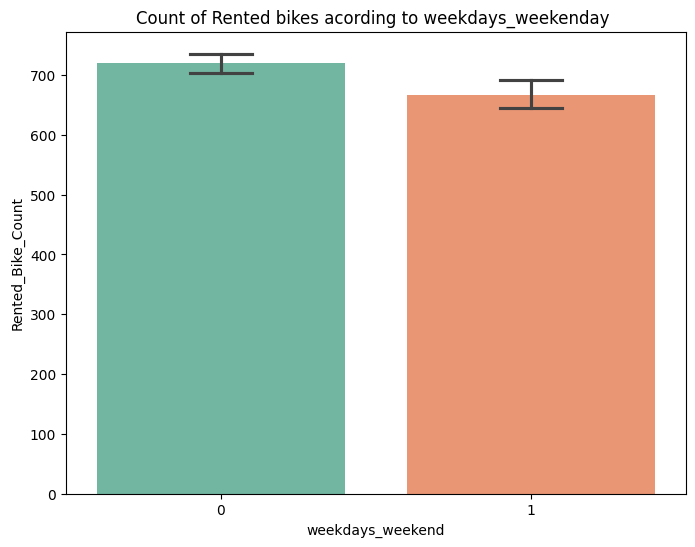

In [31]:
# Chart - 2 visualization code
palette = sns.color_palette("Set2", len(bike_df['weekdays_weekend'].unique()))
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

##### 1. Why did you pick the specific chart?

I picked the bar plot because it effectively compares bike rental counts between weekdays and weekends, highlighting differences in demand

##### 2. What is/are the insight(s) found from the chart?

From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the rental rate is higher on weekdays despite the initial assumption, leveraging this insight can optimize weekday-specific promotions or operational efficiencies, potentially increasing overall revenue. Identifying lower weekend rentals may prompt strategies to boost weekend usage, aiming to balance revenue generation across all days effectively.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

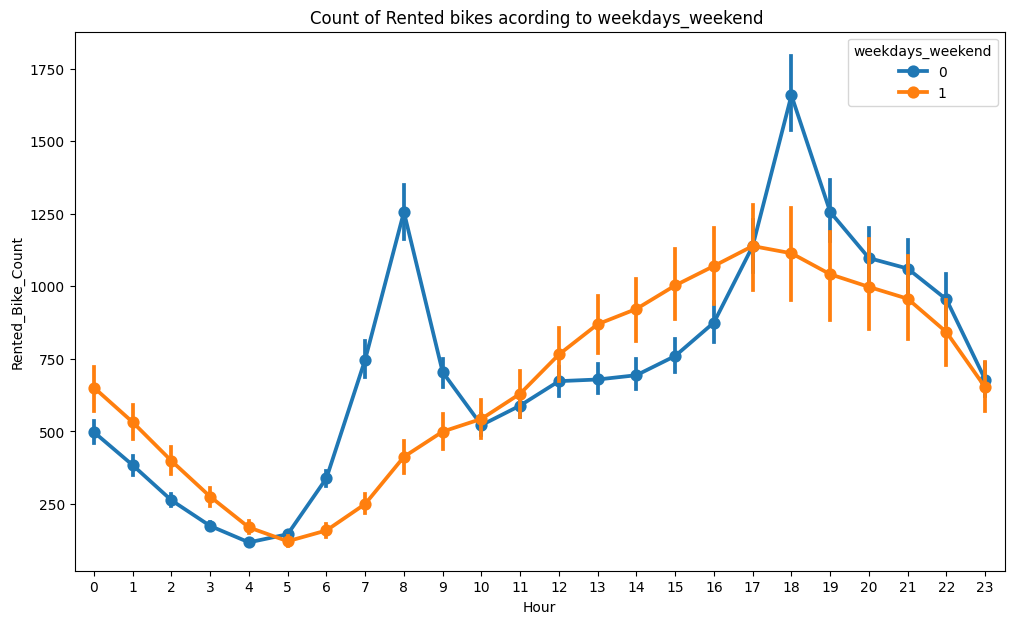

In [32]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

Peak Time are 7 am to 9 am and 5 pm to 7 pm*
The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.*

#### Chart - 3

Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

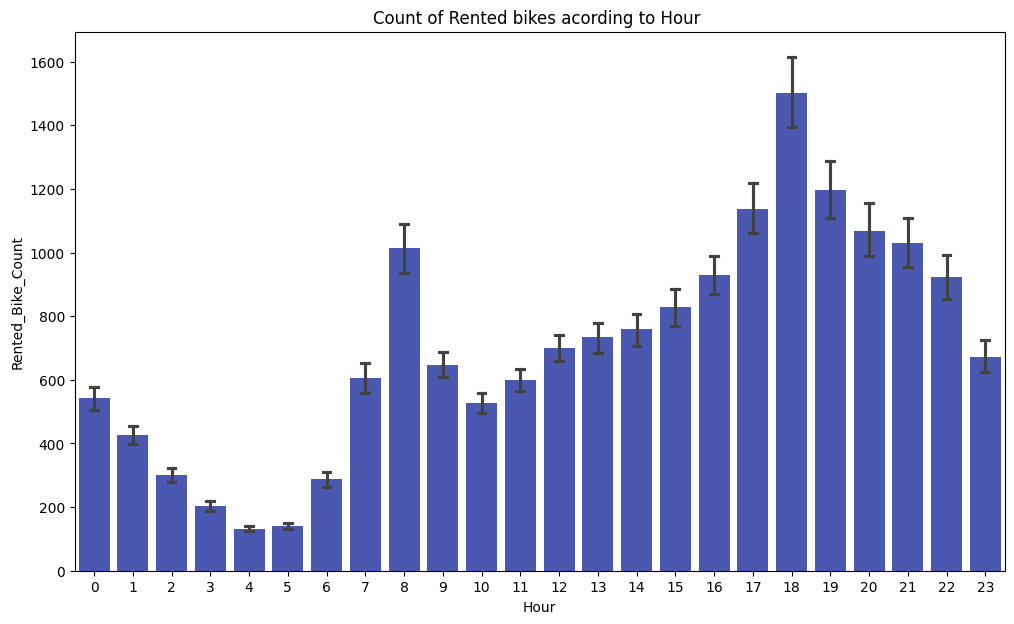

In [35]:
# Chart - 3 visualization code
palette = sns.color_palette("coolwarm", len(bike_df['Hour']))
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

I chose the bar plot for visualizing bike rental counts across hours because it effectively displays variations in demand throughout the day, helping to identify peak and off-peak hours at a glance.

##### 2. What is/are the insight(s) found from the chart?

In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.

generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

leveraging insights from peak hours can drive positive business outcomes by aligning resources with customer demand. Conversely, addressing challenges during off-peak hours is crucial to avoid potential negative impacts on profitability and overall business performance.

#### Chart - 4

Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

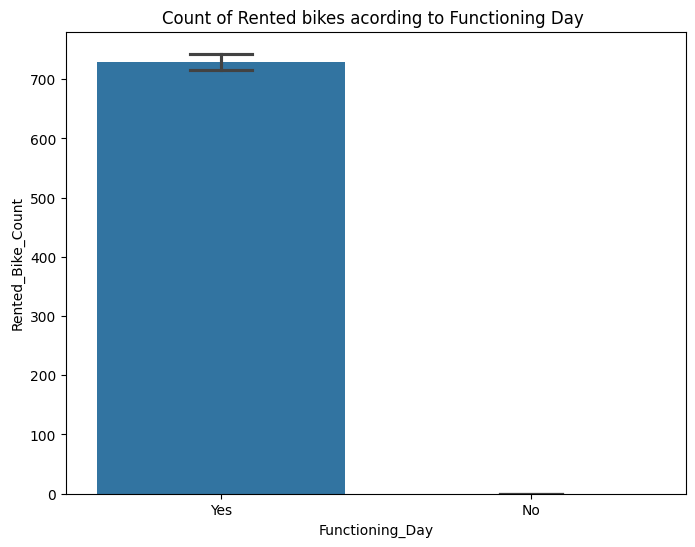

In [36]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

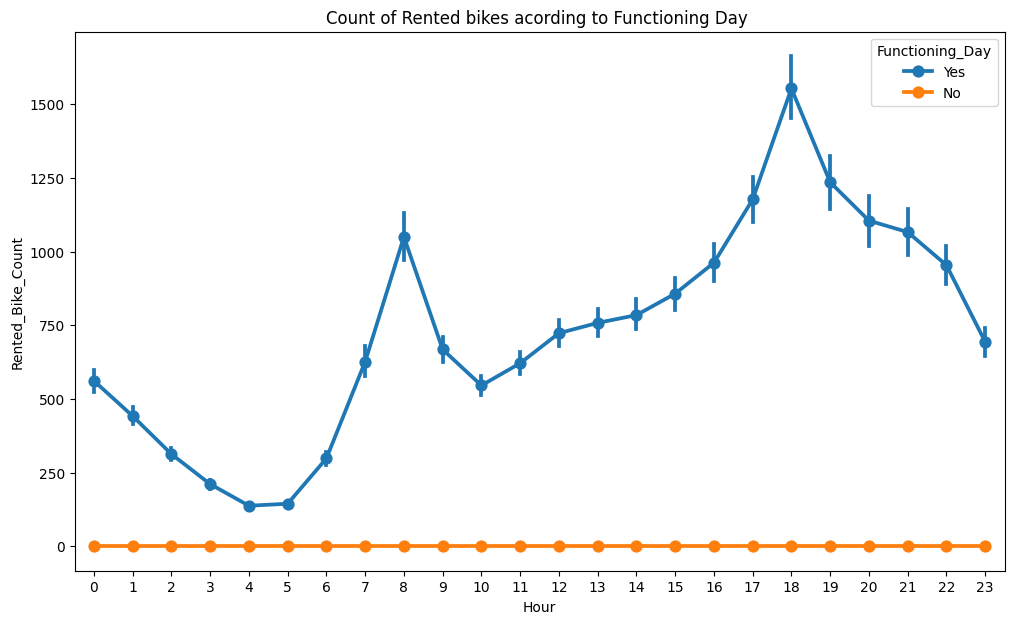

In [37]:
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

I chose the specific chart (bar plot or point plot) because it effectively illustrates the stark contrast in bike rental usage between functioning (working) days and non-functioning (non-working) days.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,
Peoples don't use reneted bikes in no functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Seasons

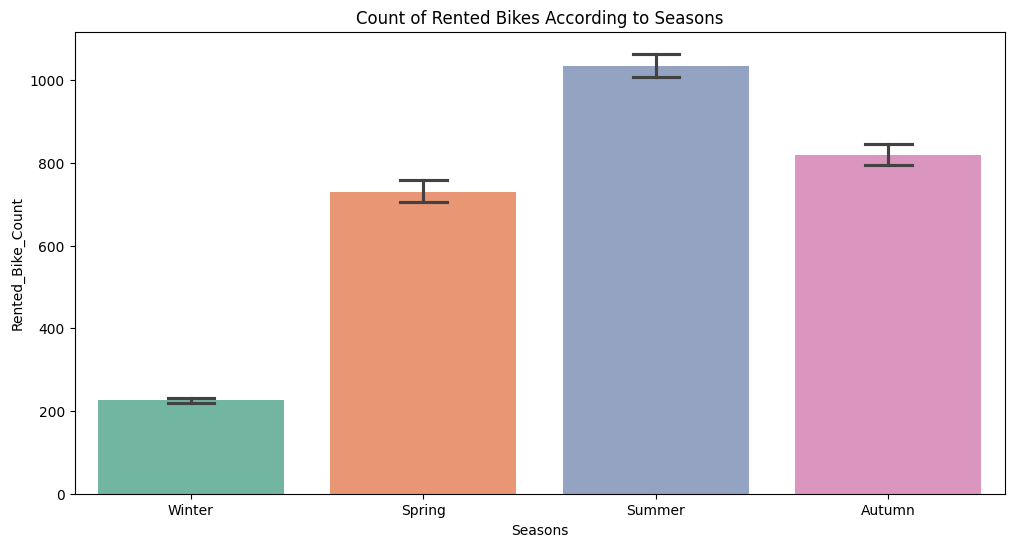

In [38]:
# Chart - 5 visualization code
palette = sns.color_palette("Set2", len(bike_df['Seasons']))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=bike_df, x='Seasons', y='Rented_Bike_Count', ax=ax, palette=palette, capsize=.2)
ax.set(title='Count of Rented Bikes According to Seasons')

plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

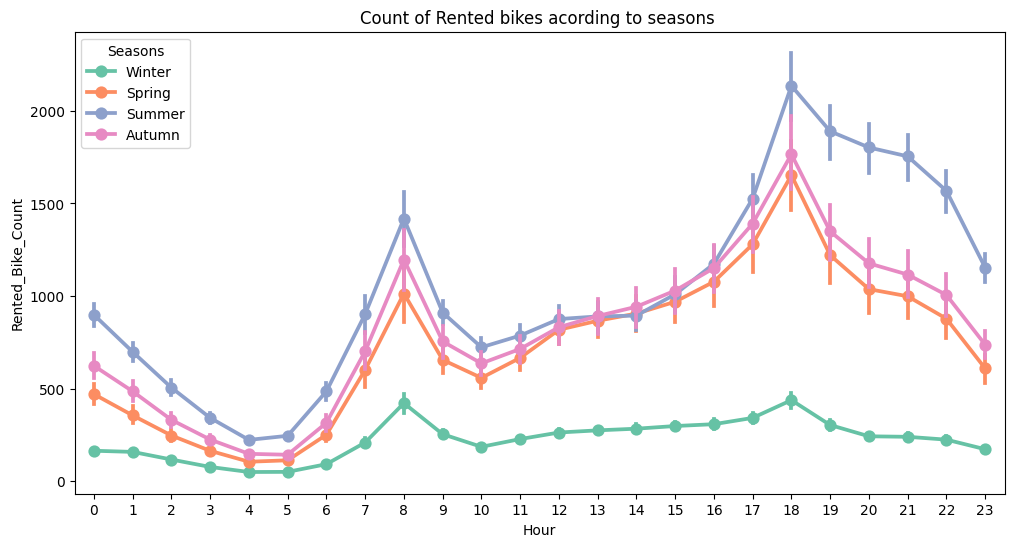

In [40]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',  palette=palette, ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows, the use of rented bike in
four different seasons, and it clearly shows that,

In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.

In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

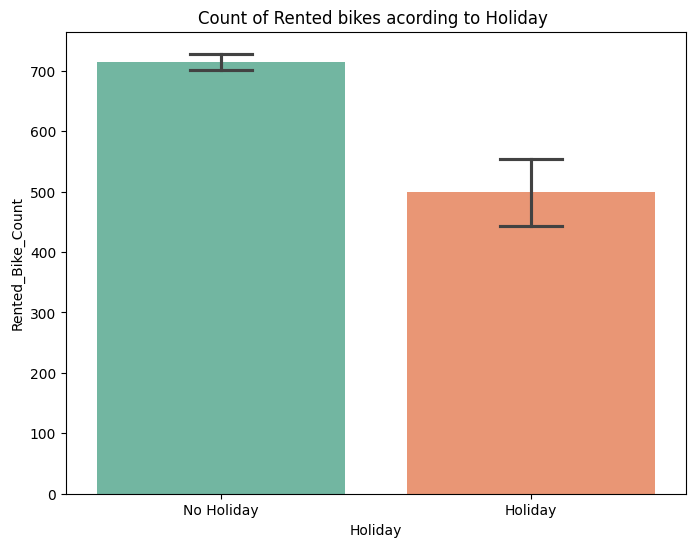

In [42]:
# Chart - 6 visualization code
palette=sns.color_palette("Set2",len(bike_df['Holiday'].unique()))
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,palette=palette,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

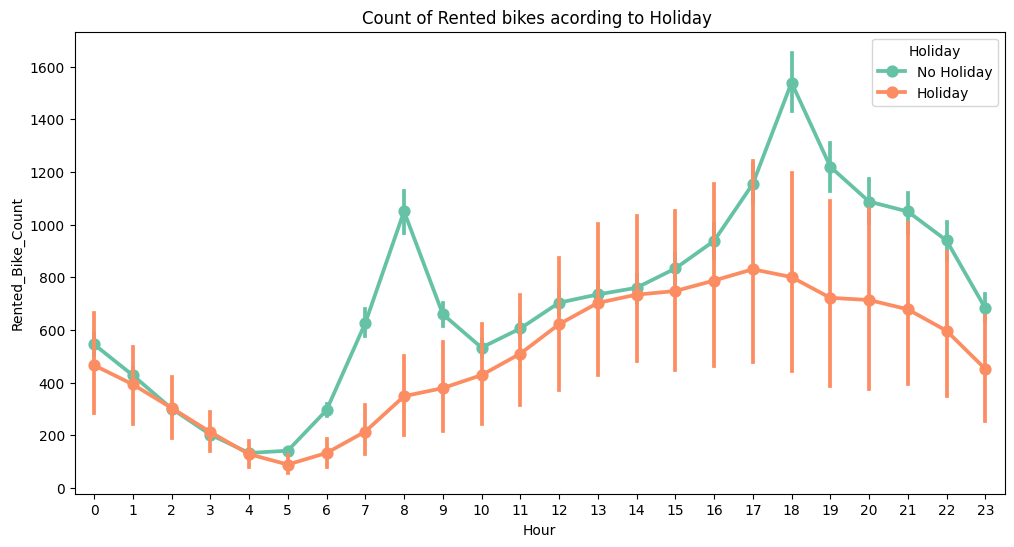

In [43]:
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',palette=palette,ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,
In holiday, people uses the rented bike from 2pm-8pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

**Analyze of Numerical variables**

#### Chart - 7

In [66]:
# Chart - 7 visualization code
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


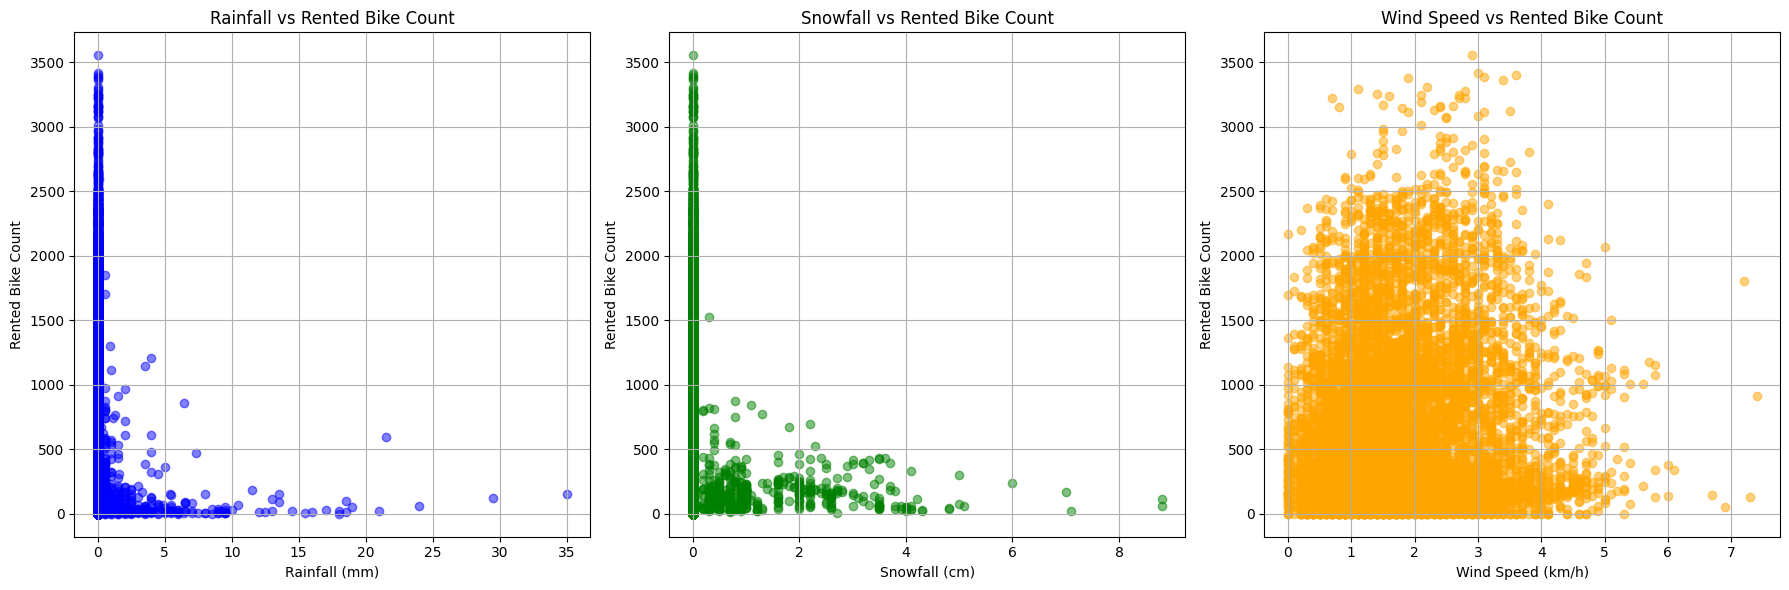

In [68]:
# Create figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Rainfall vs Rented_Bike_Count
axes[0].scatter(bike_df['Rainfall'], bike_df['Rented_Bike_Count'], color='blue', alpha=0.5)
axes[0].set_title('Rainfall vs Rented Bike Count')
axes[0].set_xlabel('Rainfall (mm)')
axes[0].set_ylabel('Rented Bike Count')
axes[0].grid(True)

# Scatter plot for Snowfall vs Rented_Bike_Count
axes[1].scatter(bike_df['Snowfall'], bike_df['Rented_Bike_Count'], color='green', alpha=0.5)
axes[1].set_title('Snowfall vs Rented Bike Count')
axes[1].set_xlabel('Snowfall (cm)')
axes[1].set_ylabel('Rented Bike Count')
axes[1].grid(True)

# Scatter plot for Wind_speed vs Rented_Bike_Count
axes[2].scatter(bike_df['Wind_speed'], bike_df['Rented_Bike_Count'], color='orange', alpha=0.5)
axes[2].set_title('Wind Speed vs Rented Bike Count')
axes[2].set_xlabel('Wind Speed (km/h)')
axes[2].set_ylabel('Rented Bike Count')
axes[2].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower

We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 10 cm of rain, the bike rents is much lower

The bike rents are great when the wind is moderate but when it increases above 5(km/h)the number of rental bikes decreases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Lets try to find how is the relation of numerical features with our dependent variable

#### Chart - 8

Numerical VS Rented Bike Count

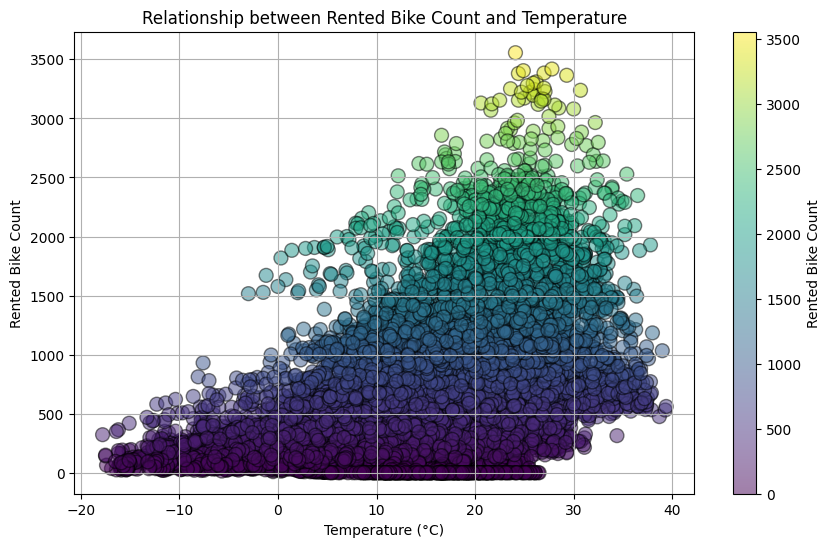

In [56]:
# Chart - 8 visualization code
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

x = bike_df['Temperature']
y = bike_df['Rented_Bike_Count']


# Create a colormap instance
norm = Normalize(vmin=min(y), vmax=max(y))
cmap = plt.get_cmap('viridis')  # Choose a colormap (e.g., 'viridis')

# Create scatter plot with colormap
plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y, c=y, cmap=cmap, s=100, alpha=0.5, edgecolor='k', linewidth=1, norm=norm)
plt.colorbar(sc, label='Rented Bike Count')  # Add colorbar showing the scale
plt.title('Relationship between Rented Bike Count and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot was chosen to visualize the relationship between "Rented_Bike_Count" and "Temperature" because it effectively shows the distribution and potential correlation between two  variable

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that people prefer riding bikes when it's around 25°C on average can help bike rental businesses by focusing promotional efforts during optimal temperature conditions, potentially increasing rental revenue.

#### Chart - 9

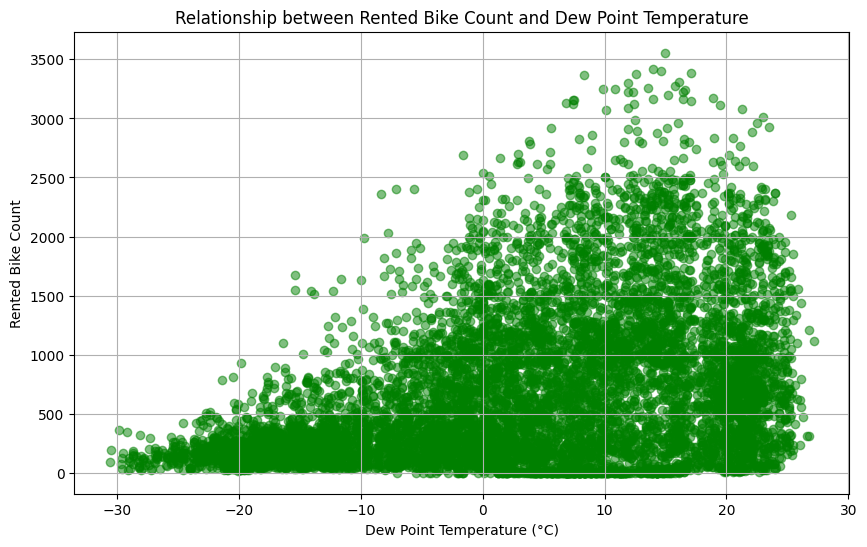

In [59]:
# Chart - 9 visualization code
# plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['Dew_point_temperature'], bike_df['Rented_Bike_Count'], color='green', alpha=0.5)
plt.title('Relationship between Rented Bike Count and Dew Point Temperature')
plt.xlabel('Dew Point Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

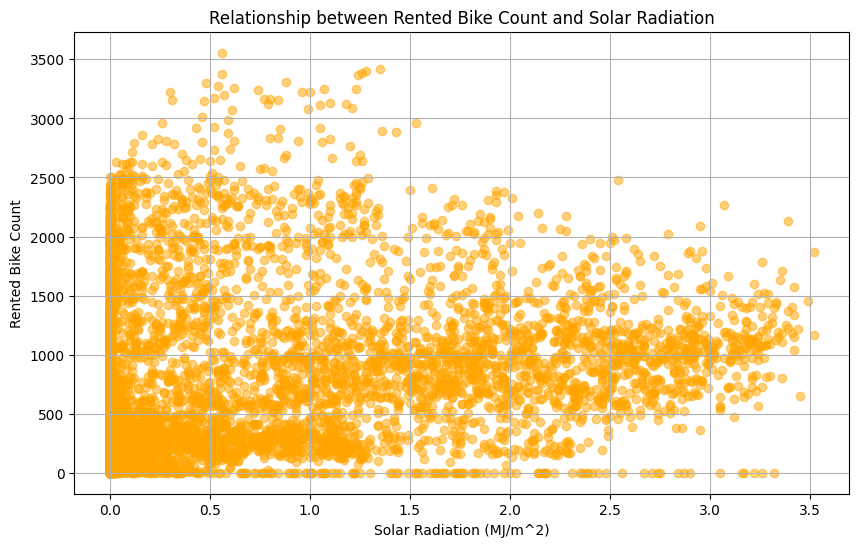

In [60]:
# Chart - 10 visualization code
#plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
plt.figure(figsize=(10, 6))
plt.scatter(bike_df['Solar_Radiation'], bike_df['Rented_Bike_Count'], color='orange', alpha=0.5)
plt.title('Relationship between Rented Bike Count and Solar Radiation')
plt.xlabel('Solar Radiation (MJ/m^2)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

when the solar radiation is below 1.5(MJ?m^2).The count of rented bike is huge and then as the radiation increases the count decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

REGRESSION PLOT

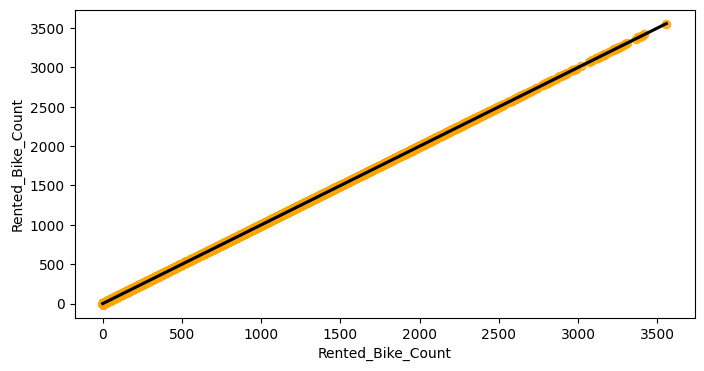

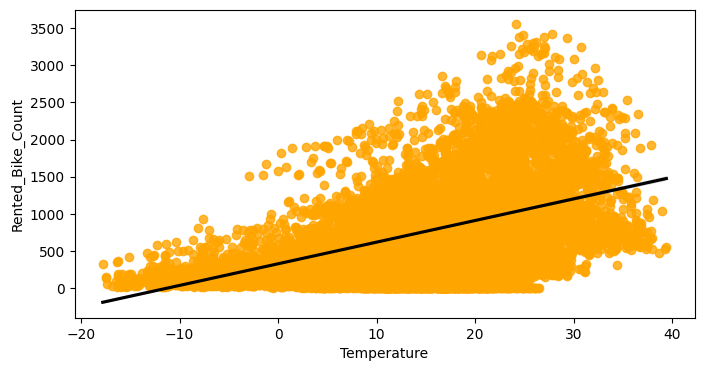

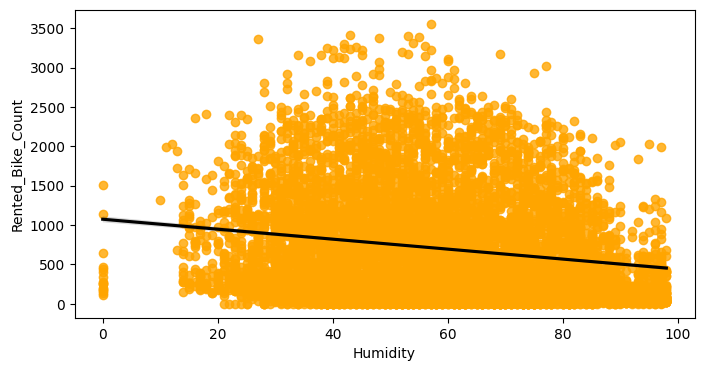

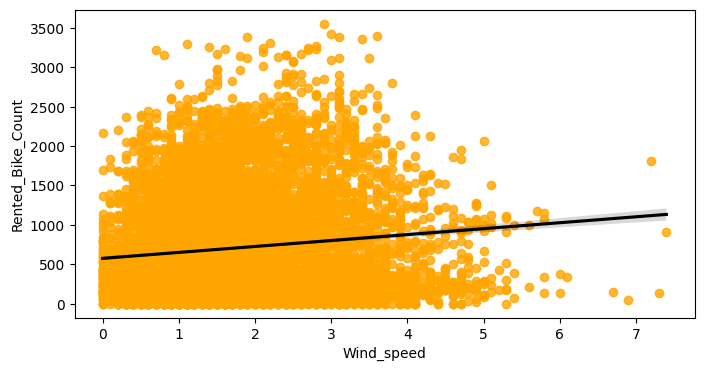

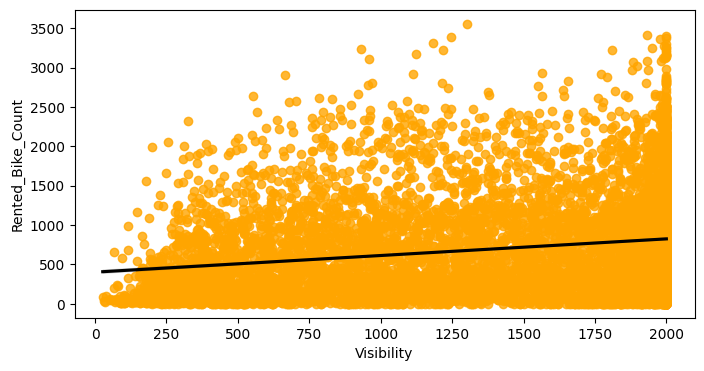

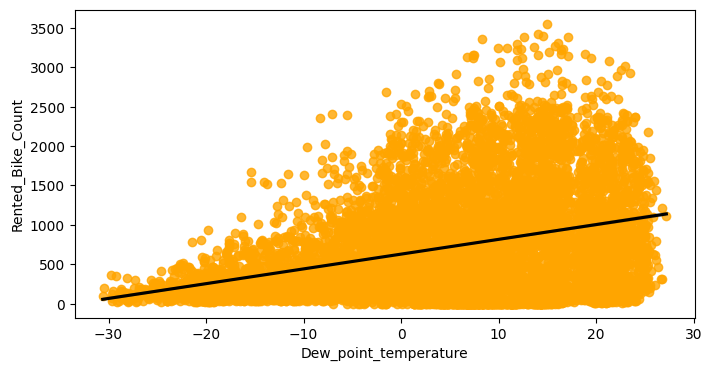

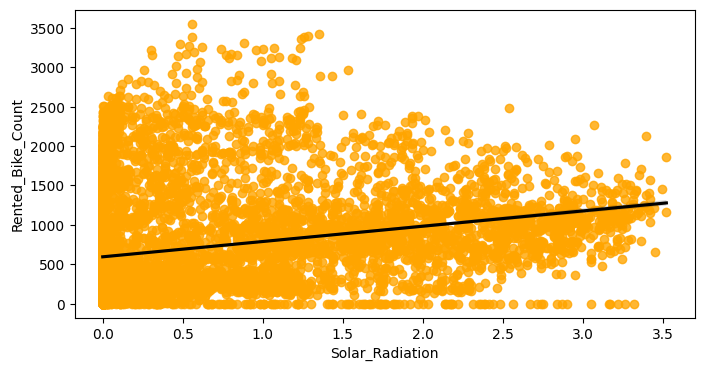

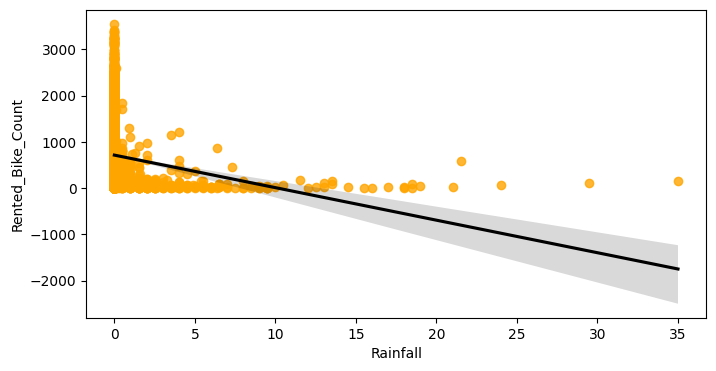

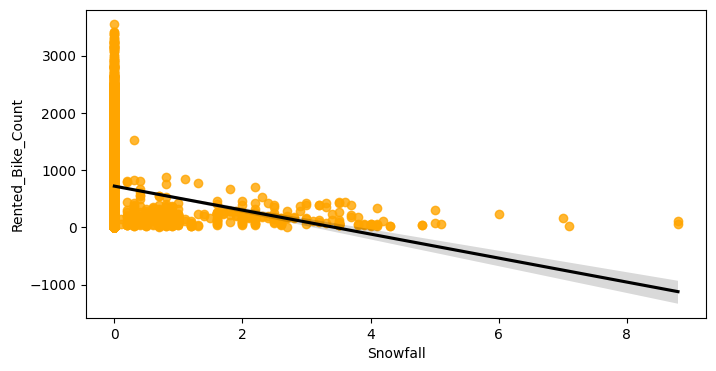

In [69]:
# Chart - 11 visualization code
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

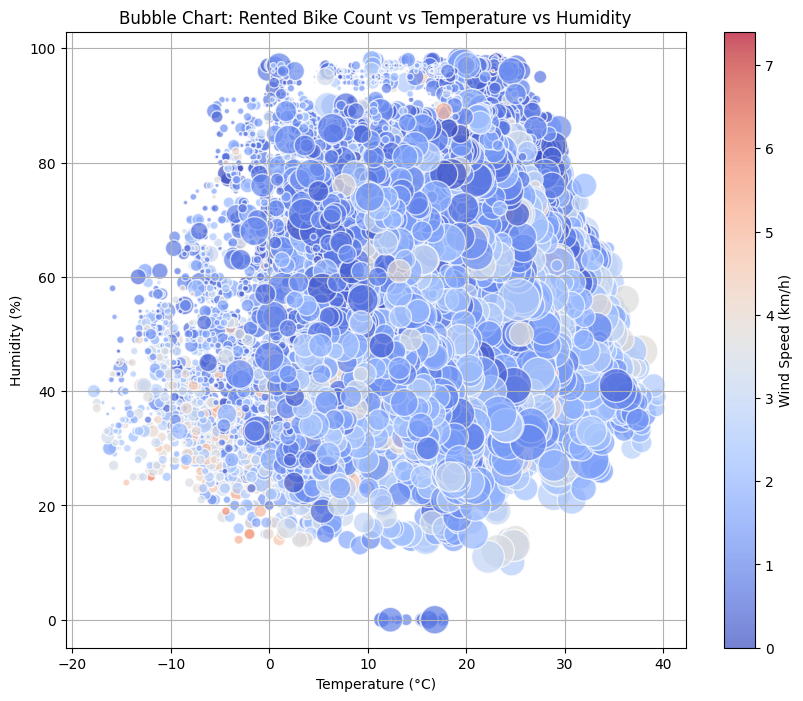

In [70]:
# Chart - 12 visualization code
normalized_counts = (bike_df['Rented_Bike_Count'] - bike_df['Rented_Bike_Count'].min()) / (bike_df['Rented_Bike_Count'].max() - bike_df['Rented_Bike_Count'].min()) * 1000

# Create bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(bike_df['Temperature'], bike_df['Humidity'], s=normalized_counts, c=bike_df['Wind_speed'], cmap='coolwarm', alpha=0.7, edgecolors='w', linewidth=1)
plt.colorbar(label='Wind Speed (km/h)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Bubble Chart: Rented Bike Count vs Temperature vs Humidity')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

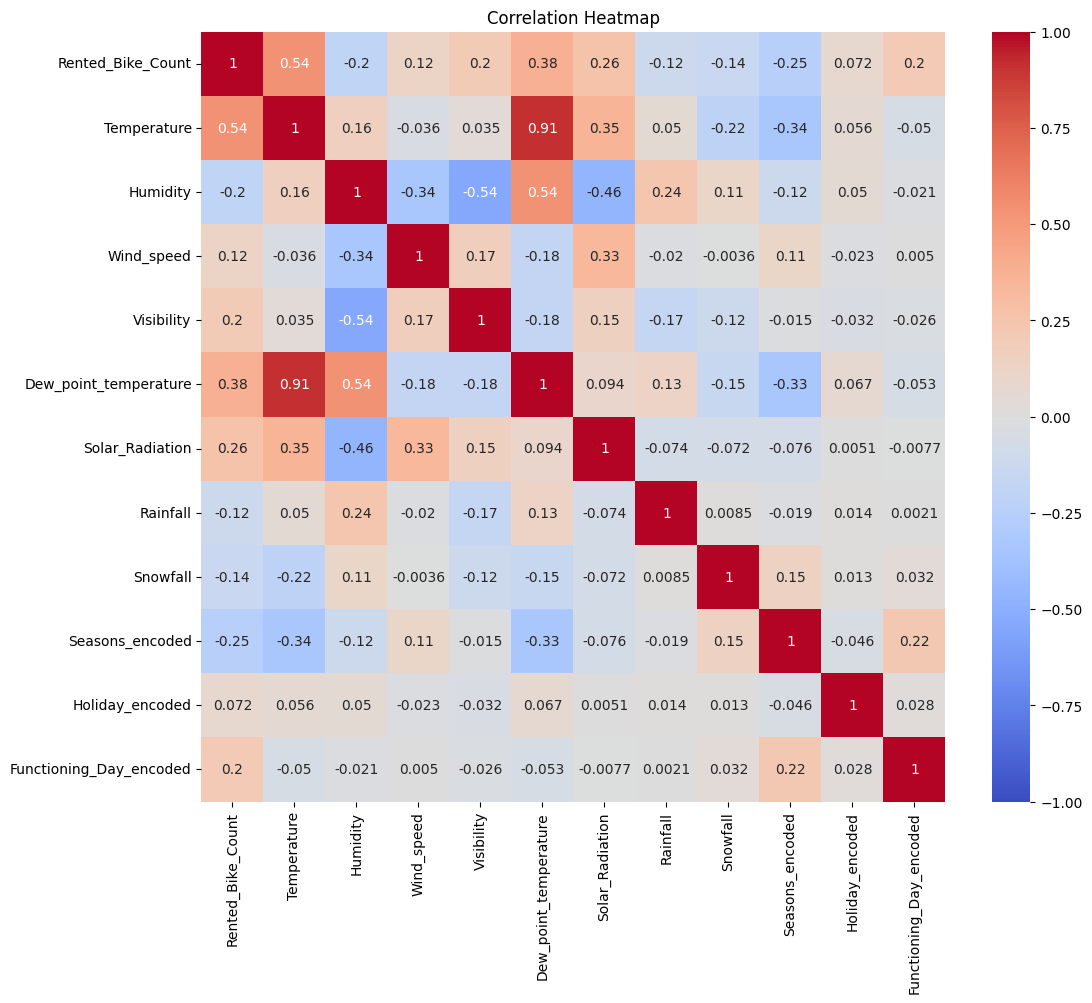

In [76]:
# Correlation Heatmap visualization code
from sklearn.preprocessing import LabelEncoder
numeric_cols = bike_df.select_dtypes(include=['float64', 'int64'])

# Encode categorical variables if needed (example using LabelEncoder)
encoder = LabelEncoder()
bike_df['Seasons_encoded'] = encoder.fit_transform(bike_df['Seasons'])
bike_df['Holiday_encoded'] = encoder.fit_transform(bike_df['Holiday'])
bike_df['Functioning_Day_encoded'] = encoder.fit_transform(bike_df['Functioning_Day'])

# Combine numeric columns and encoded categorical columns for correlation
cols_to_correlate = numeric_cols.columns.tolist() + ['Seasons_encoded', 'Holiday_encoded', 'Functioning_Day_encoded']
correlation_data = bike_df[cols_to_correlate]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen for its ability to visually represent correlation coefficients between variables, using color gradients to quickly indicate strength and direction of relationships, making it ideal for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

Temperature and Due point temperature are having strong positive correlation where as visibility and humidity have negative correlation.

#### Chart - 15 - Pair Plot

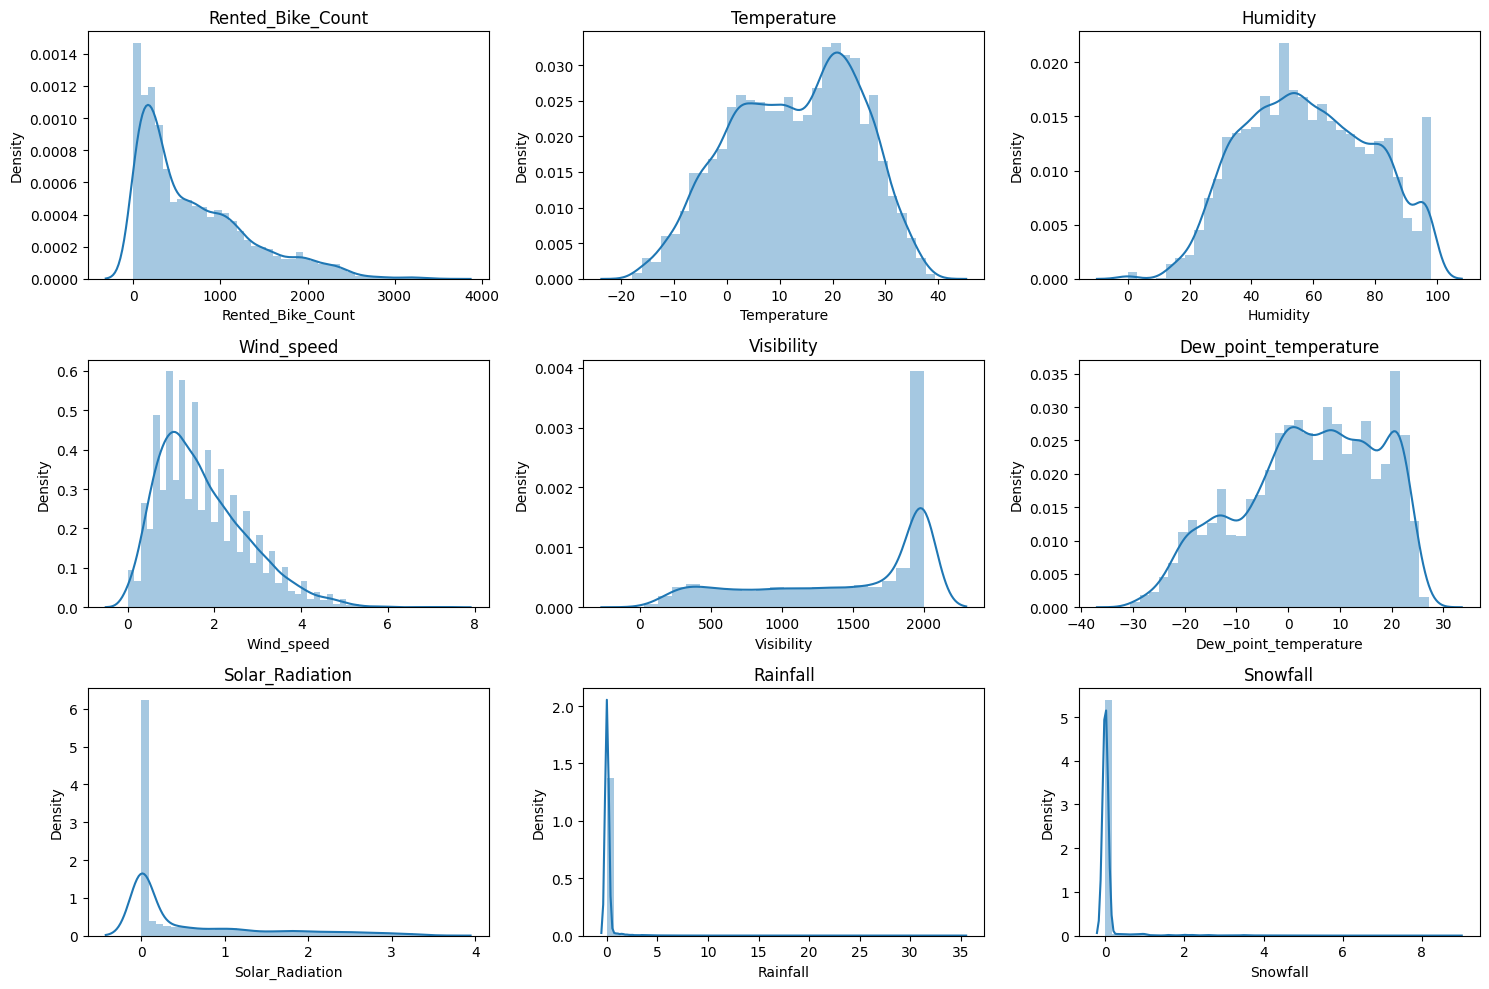

In [62]:
# Pair Plot visualization code
#printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

I selected the set of distplots (distribution plots) because they provide a concise visual overview of the distribution and spread of each numeric feature in the dataset

##### 2. What is/are the insight(s) found from the chart?

Right skewed columns are Rented Bike Count (Its also our Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

Left skewed columns are Visibility (10m), Dew point temperature(°C)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***